readdata

In [22]:
import pandas as pd
df=pd.read_csv('../Data_Q6/Bank_Customer.csv')
df

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2018/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2018/9/16,184706,1000.0


In [23]:
print(df.head())

  TransactionID CustomerID CustomerDateOfBirth CustGender CustLocation  \
0            T1   C5841053             10/1/94          F   JAMSHEDPUR   
1            T2   C2142763              4/4/57          M      JHAJJAR   
2            T3   C4417068            26/11/96          F       MUMBAI   
3            T4   C5342380             14/9/73          F       MUMBAI   
4            T5   C9031234             24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05       2002/8/16           143207   
1             2270.69       2002/8/16           141858   
2            17874.44       2002/8/16           142712   
3           866503.21       2002/8/16           142714   
4             6714.43       2002/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5  


In [24]:
df.isna().any()

TransactionID              False
CustomerID                 False
CustomerDateOfBirth         True
CustGender                  True
CustLocation                True
CustAccountBalance          True
TransactionDate            False
TransactionTime            False
TransactionAmount (INR)    False
dtype: bool

In [25]:
missing_values_per_column = df.isna().sum()
print(missing_values_per_column)

TransactionID                 0
CustomerID                    0
CustomerDateOfBirth        3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


data cleaning

In [26]:
import pandas as pd

df.dropna(subset=['CustomerDateOfBirth'], inplace=True)
# Fill the empty value of CustAccountBalance with the median
df['CustAccountBalance'].fillna(df['CustAccountBalance'].median(), inplace=True)

# 'Unknown'
df['CustGender'].fillna('Unknown', inplace=True)

# Fill CustLocation with the most common values
most_common_location = df['CustLocation'].mode()[0]
df['CustLocation'].fillna(most_common_location, inplace=True)

df


,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,2018/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,2018/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,2018/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2018/9/16,184706,1000.0


In [27]:
# Delete data whose TransactionDate time is earlier than CustomerDateOfBirth
df_cleaned = df.drop(df[df['TransactionDate'] < df['CustomerDateOfBirth']].index)

# Check for any TransactionDate before CustomerDateOfBirth
remaining_invalid_transactions = df_cleaned[df_cleaned['TransactionDate'] < df_cleaned['CustomerDateOfBirth']]

# Check for any negative or unusual transaction amounts or account balances
negative_transaction_amounts = df_cleaned[df_cleaned['TransactionAmount (INR)'] < 0]
negative_account_balances = df_cleaned[df_cleaned['CustAccountBalance'] < 0]

# Check for any unreasonable TransactionTime 
invalid_transaction_times = df_cleaned[df_cleaned['TransactionTime'] > 235959]
df=df_cleaned
# 显示检查结果remaining_invalid_transactions, negative_transaction_amounts, negative_account_balances, invalid_transaction_times



(Empty DataFrame
 Columns: [TransactionID, CustomerID, CustomerDateOfBirth, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
 Index: [],
 Empty DataFrame
 Columns: [TransactionID, CustomerID, CustomerDateOfBirth, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
 Index: [],
 Empty DataFrame
 Columns: [TransactionID, CustomerID, CustomerDateOfBirth, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
 Index: [],
 Empty DataFrame
 Columns: [TransactionID, CustomerID, CustomerDateOfBirth, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
 Index: [])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14696\2782941101.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDateOfBirth'] = pd.to_datetime(df['CustomerDateOfBirth'], errors='coerce')


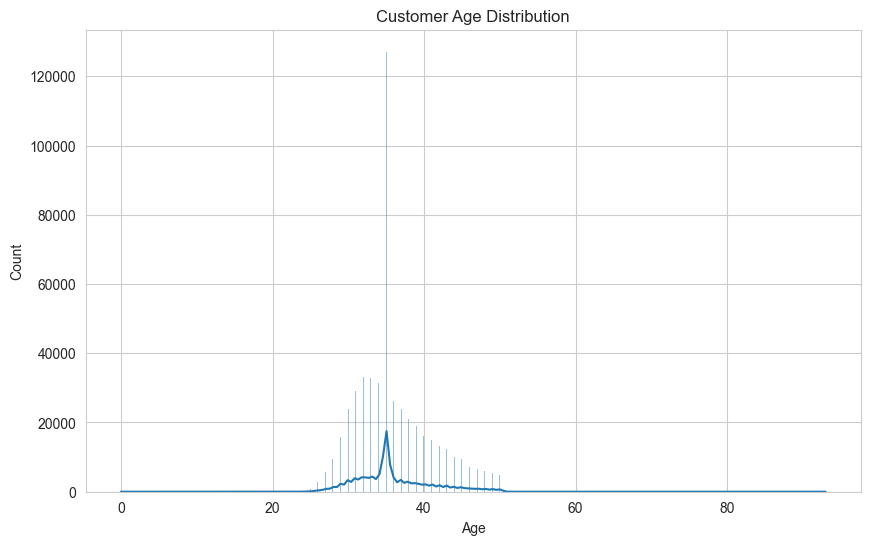

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# compute age
current_date = datetime.now()
df['CustomerDateOfBirth'] = pd.to_datetime(df['CustomerDateOfBirth'], errors='coerce')  
df['CustomerAge'] = (current_date - df['CustomerDateOfBirth']).dt.days // 365

median_age = df['CustomerAge'].median()
df.loc[df['CustomerAge'] < 0, 'CustomerAge'] = median_age
df.loc[df['CustomerDateOfBirth'].dt.year < 1900, 'CustomerAge'] = median_age

df = df[df['CustomerAge'].between(0, 100)]

plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], kde=True)
plt.title('Customer Age Distribution') 
plt.xlabel('Age') 
plt.ylabel('Count')  
plt.show()




this pic look strange because I change the incorrect age into medianage

Gender account

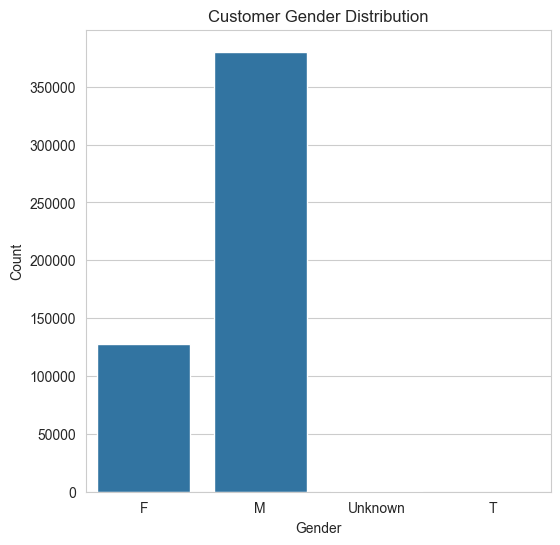

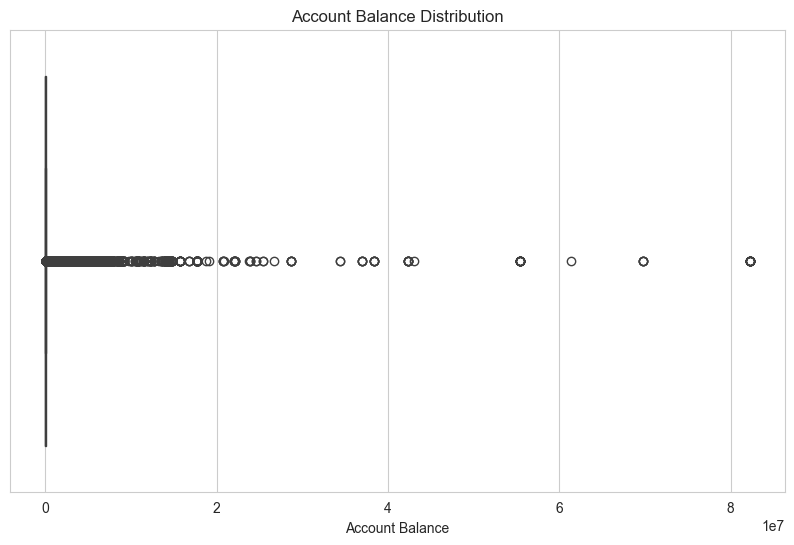

In [29]:
# Customer Gender Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='CustGender', data=df)
plt.title('Customer Gender Distribution')  
plt.xlabel('Gender')  
plt.ylabel('Count')  
plt.show()

# Account Balance Distribution
# 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CustAccountBalance'])
plt.title('Account Balance Distribution') 
plt.xlabel('Account Balance')  
plt.show()


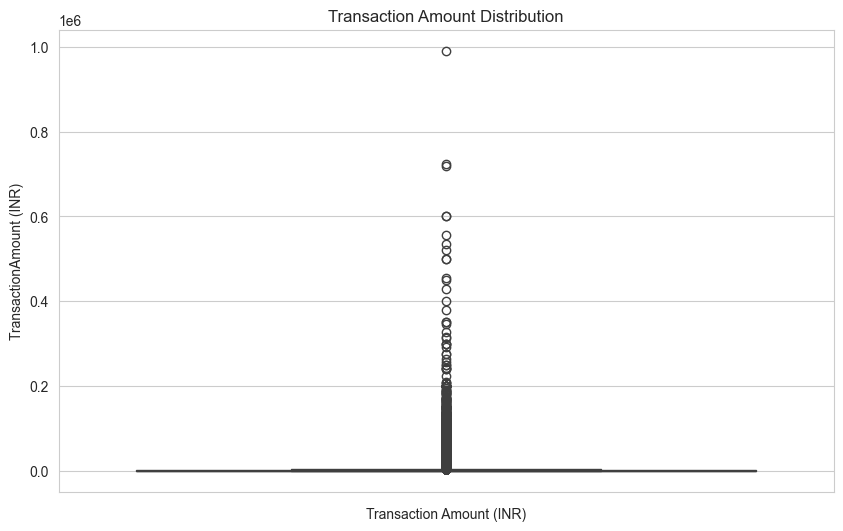

In [30]:
# Transaction Amount Distribution
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(df['TransactionAmount (INR)'])
plt.title('Transaction Amount Distribution')  
plt.xlabel('Transaction Amount (INR)')  
plt.show()


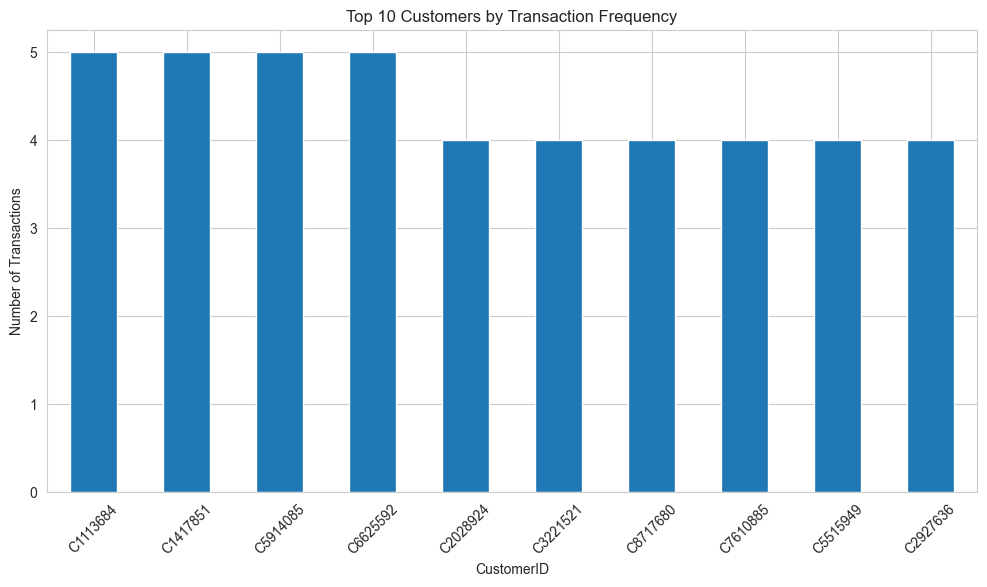

In [31]:
transaction_counts = df['CustomerID'].value_counts().head(10)

plt.figure(figsize=(12, 6))
transaction_counts.plot(kind='bar')
plt.title('Top 10 Customers by Transaction Frequency')  
plt.xlabel('CustomerID')  
plt.ylabel('Number of Transactions')  
plt.xticks(rotation=45)
plt.show()


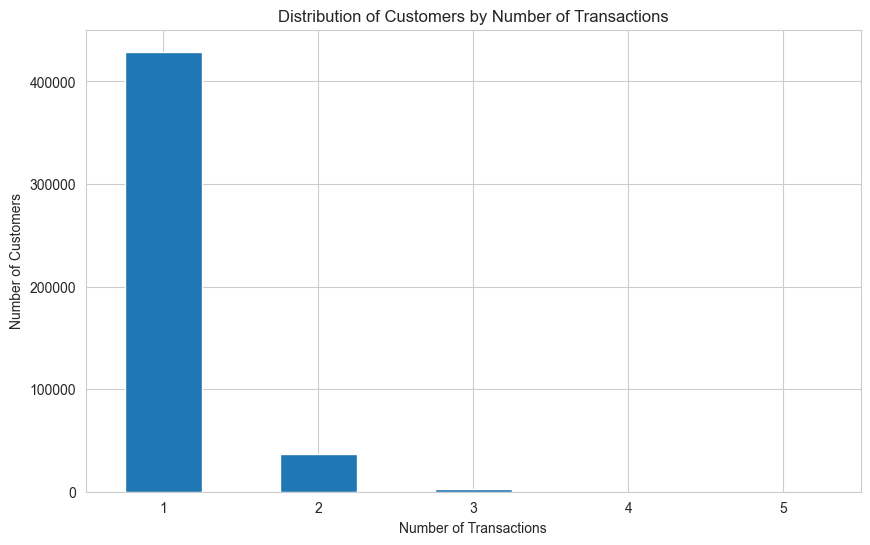

In [32]:
# Distribution of Customers by Number of Transactions
transaction_counts = df['CustomerID'].value_counts()

# 1-6
transaction_counts = transaction_counts[transaction_counts.between(1, 6)]

# compute
transaction_distribution = transaction_counts.value_counts().sort_index()


plt.figure(figsize=(10, 6))
transaction_distribution.plot(kind='bar')
plt.title('Distribution of Customers by Number of Transactions')  
plt.xlabel('Number of Transactions')  
plt.ylabel('Number of Customers')  
plt.xticks(rotation=0)
plt.show()


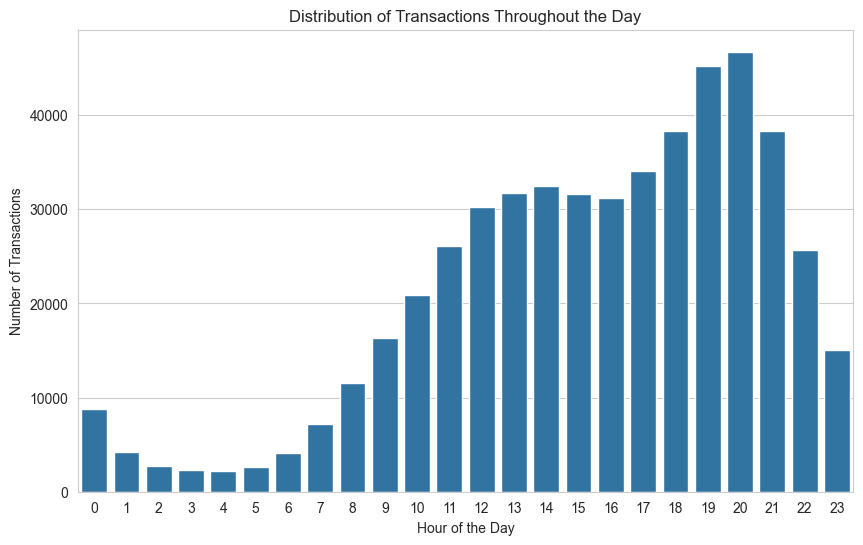

In [33]:
# Convert TransactionTime to hours
df['TransactionHour'] = df['TransactionTime'] // 10000

# Visualize the distribution of transactions throughout the day
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionHour', data=df)
plt.title('Distribution of Transactions Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.show()


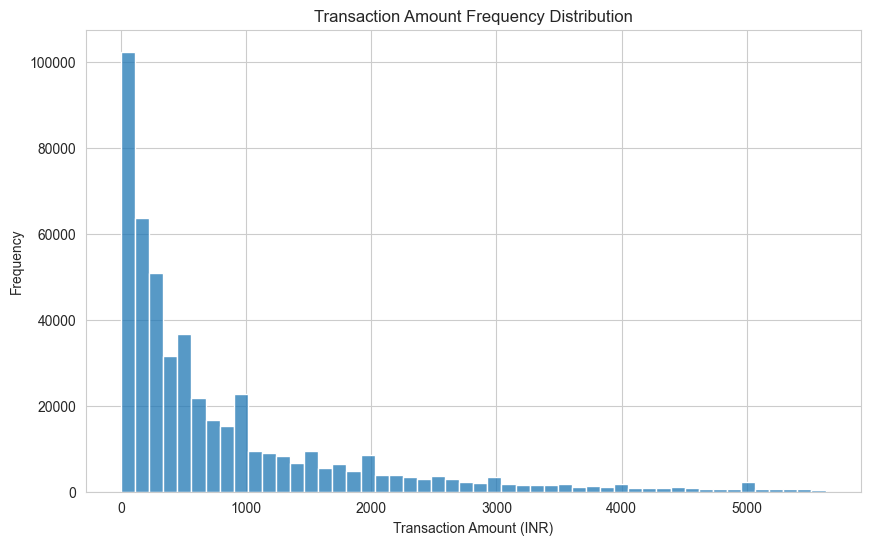

In [34]:
# Visualize the frequency distribution of transaction amounts (main body of data)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['TransactionAmount (INR)'] <= df['TransactionAmount (INR)'].quantile(0.95)]['TransactionAmount (INR)'], bins=50)
plt.title('Transaction Amount Frequency Distribution')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()


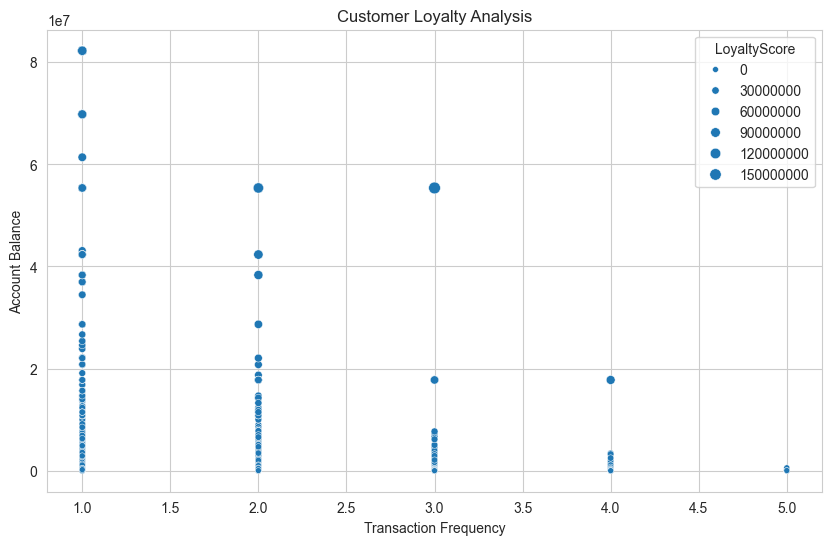

In [35]:
# Calculate transaction frequency by CustomerID
df['TransactionFrequency'] = df.groupby('CustomerID')['TransactionID'].transform('count')

# Calculate loyalty score as the product of transaction frequency and account balance
df['LoyaltyScore'] = df['TransactionFrequency'] * df['CustAccountBalance']

# Visualize customer loyalty
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionFrequency', y='CustAccountBalance', size='LoyaltyScore', data=df)
plt.title('Customer Loyalty Analysis')
plt.xlabel('Transaction Frequency')
plt.ylabel('Account Balance')
plt.show()


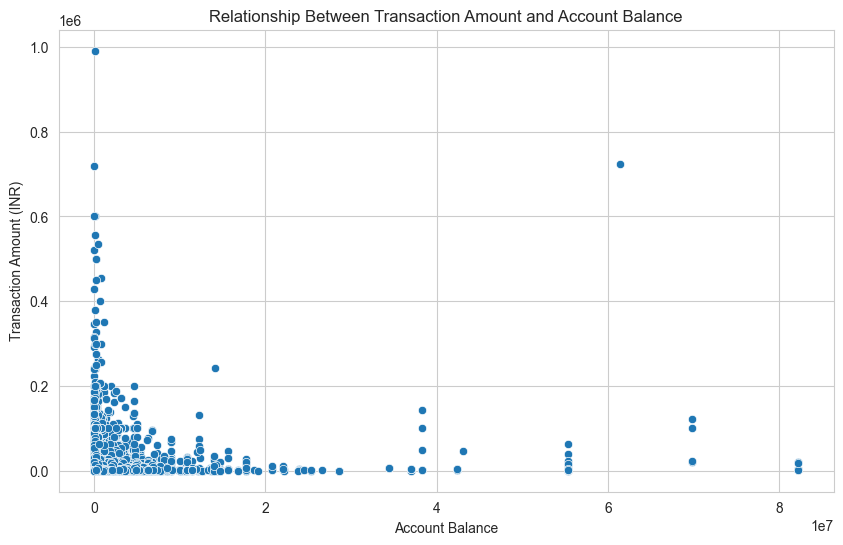

In [36]:
# Visualize the relationship between transaction amount and account balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df)
plt.title('Relationship Between Transaction Amount and Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.show()


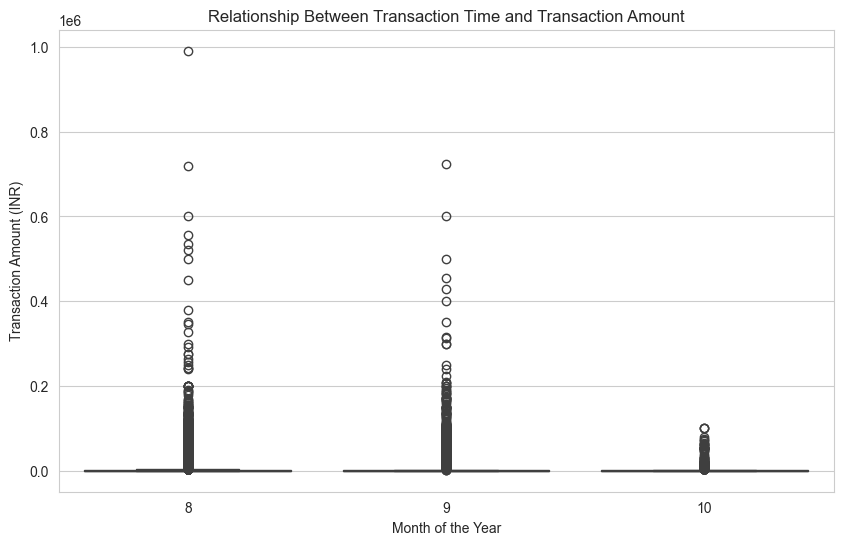

In [37]:
# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Visualize the relationship between transaction date and transaction amount
plt.figure(figsize=(10, 6))
df['TransactionMonth'] = df['TransactionDate'].dt.month
sns.boxplot(x='TransactionMonth', y='TransactionAmount (INR)', data=df)
plt.title('Relationship Between Transaction Time and Transaction Amount')
plt.xlabel('Month of the Year')
plt.ylabel('Transaction Amount (INR)')
plt.show()


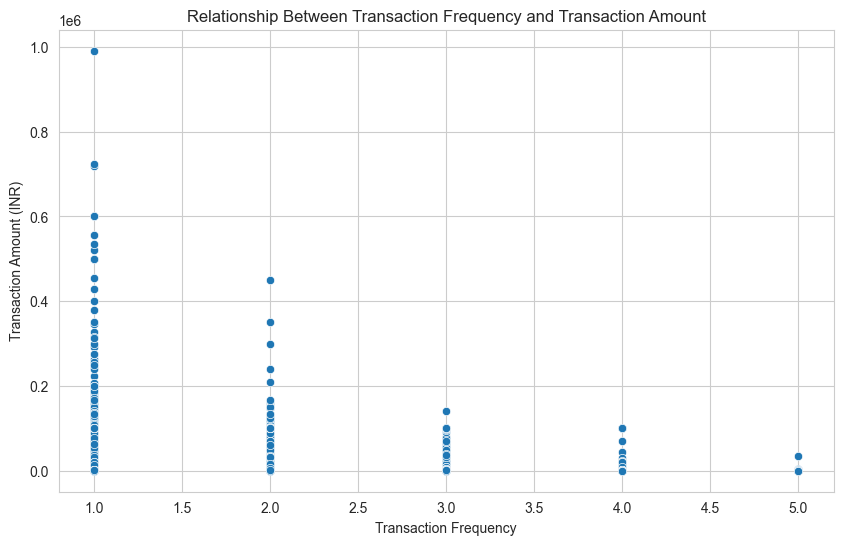

In [38]:
# Visualize the relationship between transaction frequency and transaction amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionFrequency', y='TransactionAmount (INR)', data=df)
plt.title('Relationship Between Transaction Frequency and Transaction Amount')
plt.xlabel('Transaction Frequency')
plt.ylabel('Transaction Amount (INR)')
plt.show()


fentures:

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import SimpleImputer

df['TransactionFrequency'] = df.groupby('CustomerID')['TransactionID'].transform('count')


df['CustomerDateOfBirth'] = pd.to_datetime(df['CustomerDateOfBirth'], errors='coerce', format='%Y-%m-%d')
df['CustomerAge'] = (pd.Timestamp('now') - df['CustomerDateOfBirth']).dt.days // 365

df = df[df['CustGender'].isin(['M', 'F'])]


df['GenderCode'] = df['CustGender'].map({'M': 0, 'F': 1})

df['LoyaltyScore'] = df['TransactionFrequency'] * df['CustAccountBalance']


df['TransactionHour'] = df['TransactionTime'] // 10000


df['TransactionMonth'] = pd.to_datetime(df['TransactionDate']).dt.month


df.sort_values(by=['CustomerID', 'TransactionDate'], inplace=True)
df['PreviousTransactionDate'] = df.groupby('CustomerID')['TransactionDate'].shift(1)
df['TransactionInterval'] = (pd.to_datetime(df['TransactionDate']) - pd.to_datetime(df['PreviousTransactionDate'])).dt.days
df['AverageTransactionInterval'] = df.groupby('CustomerID')['TransactionInterval'].transform('mean')


scaler = StandardScaler()

# financial_features
financial_features = df[['CustAccountBalance', 'TransactionAmount (INR)']]
financial_features_scaled = scaler.fit_transform(financial_features)

# customer_features
customer_features = df[['CustomerAge', 'LoyaltyScore']]
customer_features_scaled = scaler.fit_transform(customer_features)

# time_features
time_features = df[['TransactionMonth', 'AverageTransactionInterval']]

imputer = SimpleImputer(strategy='median')
time_features_imputed = imputer.fit_transform(time_features)

scaler = StandardScaler()
time_features_scaled = scaler.fit_transform(time_features_imputed)


D:\anaconda3\envs\dcai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


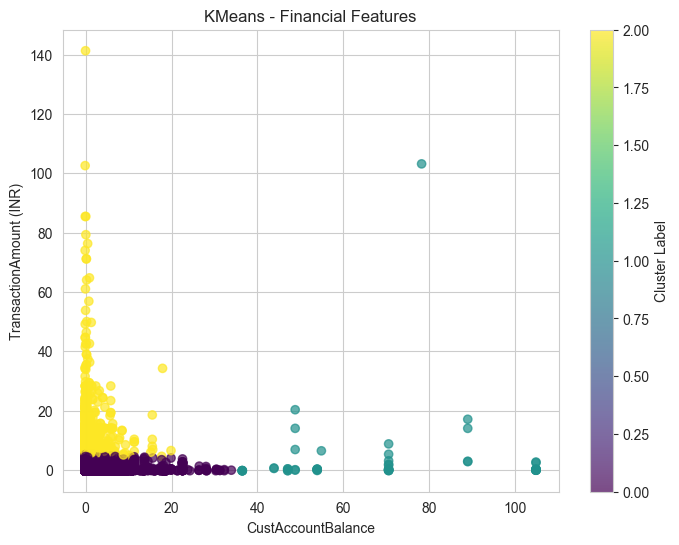

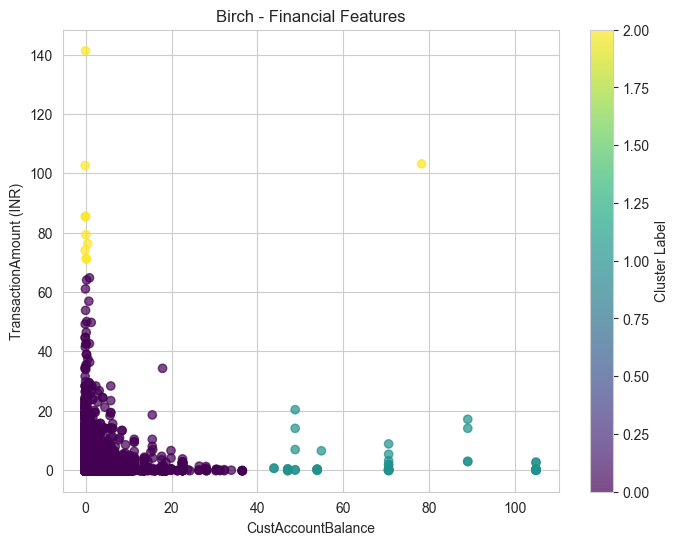

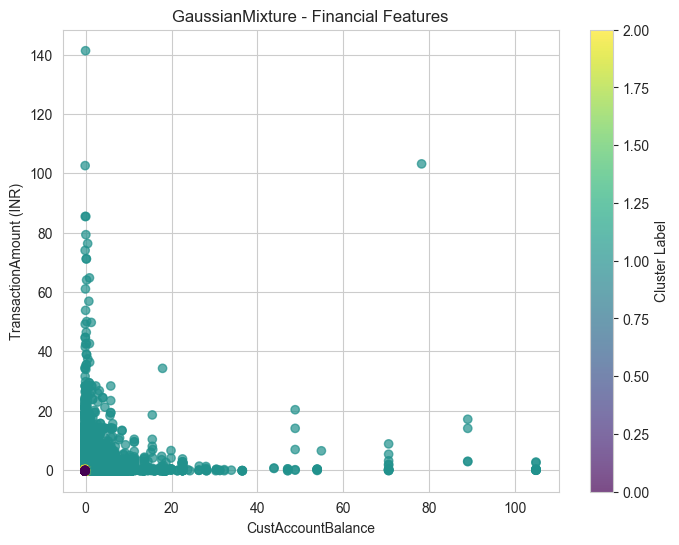

In [40]:
# Define a function to perform clustering and plot
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
def perform_clustering_and_visualize(clustering_alg, features, title_suffix):
    clusters = clustering_alg.fit_predict(features)
    plt.figure(figsize=(8, 6))
    plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title(f'{clustering_alg.__class__.__name__} - {title_suffix}')
    plt.xlabel('CustAccountBalance')
    plt.ylabel('TransactionAmount (INR)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Define the number of clusters
n_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
perform_clustering_and_visualize(kmeans, financial_features_scaled, 'Financial Features')

# Perform BIRCH clustering
birch = Birch(n_clusters=n_clusters)
perform_clustering_and_visualize(birch, financial_features_scaled, 'Financial Features')

# Perform GaussianMixture clustering
gaussian_mixture = GaussianMixture(n_components=n_clusters, random_state=42)
perform_clustering_and_visualize(gaussian_mixture, financial_features_scaled, 'Financial Features')



In [49]:
n_clusters = 3 


kmeans = KMeans(n_clusters=n_clusters, random_state=42)


kmeans.fit(financial_features_scaled)


df['Cluster'] = kmeans.labels_


centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=['CustAccountBalance', 'TransactionAmount (INR)'])


print(centroids_df)

for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Statistics:")
    print(cluster_data[['CustAccountBalance', 'TransactionAmount (INR)']].describe())

D:\anaconda3\envs\dcai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   CustAccountBalance  TransactionAmount (INR)
0            8.375223              3090.777390
1           42.995035             14645.313845
2            8.596073             32557.160015
Cluster 0 Statistics:
       CustAccountBalance  TransactionAmount (INR)
count        5.058320e+05            505832.000000
mean         1.126729e+05              1347.114659
std          5.046981e+05              2996.044540
min          0.000000e+00                 0.000000
25%          4.766065e+03               166.000000
50%          1.721598e+04               479.000000
75%          6.027071e+04              1239.077500
max          2.667888e+07             38200.000000
Cluster 1 Statistics:
       CustAccountBalance  TransactionAmount (INR)
count        5.300000e+01                53.000000
mean         5.515091e+07             30222.519057
std          1.895060e+07            102337.534390
min          2.866647e+07                12.000000
25%          3.832115e+07              1370.000000
50%

   CustomerAge   LoyaltyScore
0     8.516089  176349.535012
1     8.379874    3211.433689
2     9.695565  505091.553360
Cluster 0 Statistics:
       CustomerAge  LoyaltyScore
count    62.000000  6.200000e+01
mean     68.806452  5.739118e+07
std     118.886616  2.059808e+07
min     -50.000000  3.445782e+07
25%     -39.250000  3.832115e+07
50%      19.000000  5.536969e+07
75%     224.000000  8.084405e+07
max     224.000000  1.107394e+08
Cluster 1 Statistics:
         CustomerAge  LoyaltyScore
count  508264.000000  5.082640e+05
mean       50.883474  1.328880e+05
std        64.801774  5.945827e+05
min       -50.000000  0.000000e+00
25%        31.000000  5.283227e+03
50%        35.000000  1.960052e+04
75%        42.000000  6.994278e+04
max       224.000000  2.938765e+07
Cluster 2 Statistics:
       CustomerAge  LoyaltyScore
count          1.0  1.000000e+00
mean         224.0  1.661091e+08
std            NaN           NaN
min          224.0  1.661091e+08
25%          224.0  1.661091e+08
50% 

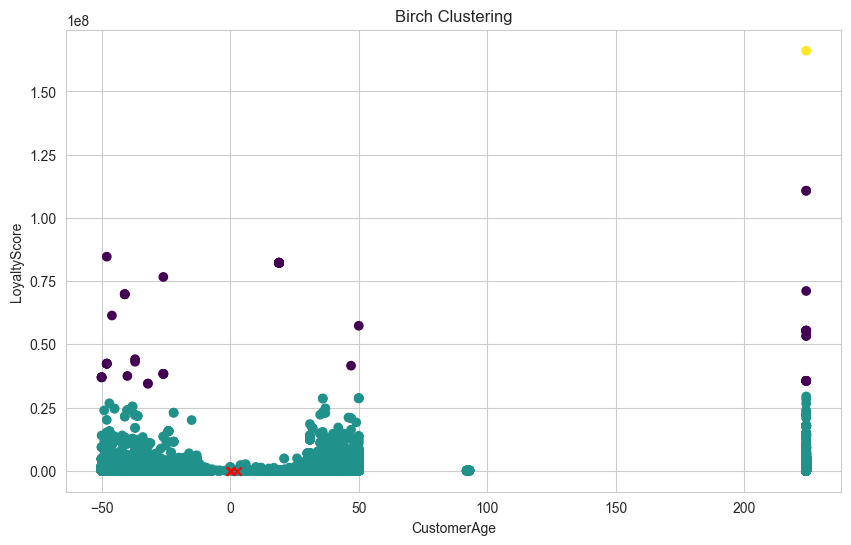

In [45]:
from sklearn.cluster import Birch
import pandas as pd
import numpy as np


n_clusters = 3  


birch = Birch(n_clusters=n_clusters)

birch.fit(customer_features_scaled)


df['Cluster'] = birch.labels_

centroids = []
for i in range(n_clusters):
    cluster_data = customer_features_scaled[df['Cluster'] == i]
    centroids.append(cluster_data.mean(axis=0))


centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=['CustomerAge', 'LoyaltyScore'])


print(centroids_df)


for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Statistics:")
    print(cluster_data[['CustomerAge', 'LoyaltyScore']].describe())


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['CustomerAge'], df['LoyaltyScore'], c=df['Cluster'], cmap='viridis')

for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], c='red', marker='x')  
plt.title('Birch Clustering')
plt.xlabel('CustomerAge')
plt.ylabel('LoyaltyScore')
plt.show()


D:\anaconda3\envs\dcai\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


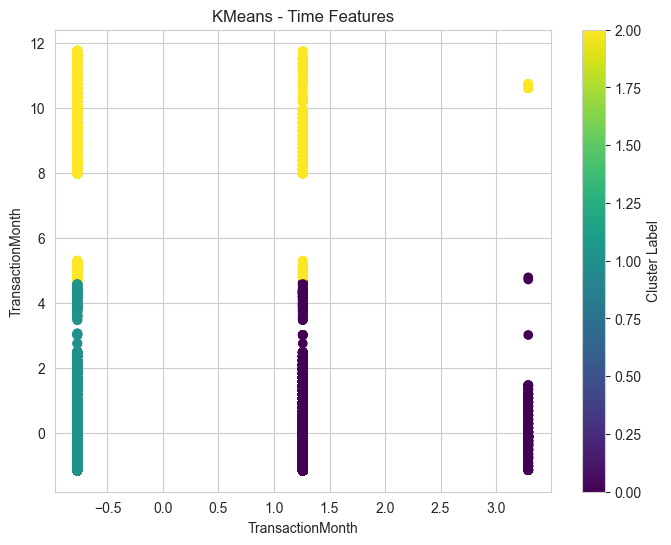

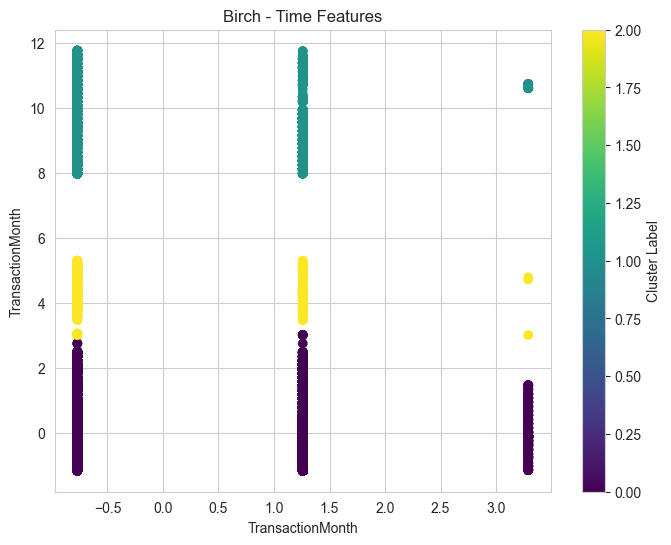

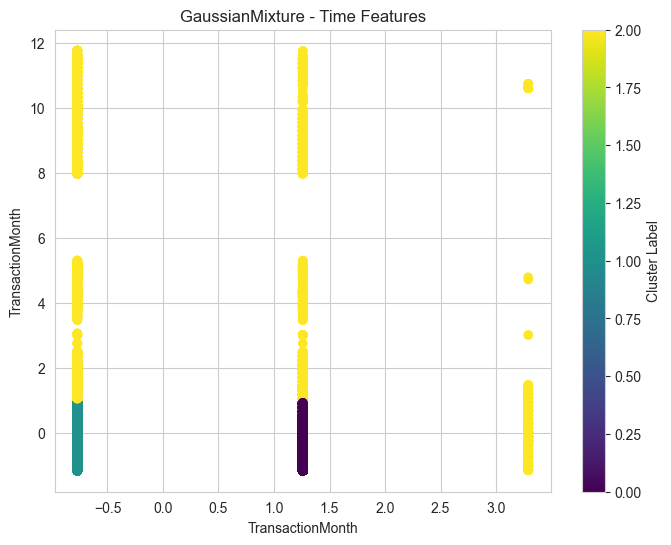

In [43]:

import matplotlib.pyplot as plt
import numpy as np

# Assume df is your DataFrame and time_features are defined as shown earlier.

# Fill missing values with median and scale the features
imputer = SimpleImputer(strategy='median')
time_features_imputed = imputer.fit_transform(time_features)
scaler = StandardScaler()
time_features_scaled = scaler.fit_transform(time_features_imputed)

# Define a function to perform clustering and plot
def perform_clustering_and_visualize(clustering_alg, features, title_suffix):
    clusters = clustering_alg.fit_predict(features)
    plt.figure(figsize=(8, 6))
    plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis')
    plt.title(f'{clustering_alg.__class__.__name__} - {title_suffix}')
    plt.xlabel('TransactionMonth')
    plt.ylabel('TransactionMonth')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Define the number of clusters
n_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
perform_clustering_and_visualize(kmeans, time_features_scaled, 'Time Features')

# Perform BIRCH clustering
birch = Birch(n_clusters=n_clusters)
perform_clustering_and_visualize(birch, time_features_scaled, 'Time Features')

# Perform GaussianMixture clustering
gaussian_mixture = GaussianMixture(n_components=n_clusters, random_state=42)
perform_clustering_and_visualize(gaussian_mixture, time_features_scaled, 'Time Features')


In [50]:
n_clusters = 3  

birch = Birch(n_clusters=n_clusters)

birch.fit(time_features_scaled)

df['Cluster'] = birch.labels_

centroids = []
for i in range(n_clusters):
    cluster_data = time_features_scaled[df['Cluster'] == i]
    centroids.append(cluster_data.mean(axis=0))

centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=['TransactionMonth', 'AverageTransactionInterval'])

print(centroids_df)

for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Statistics:")
    print(cluster_data[['TransactionMonth', 'AverageTransactionInterval']].describe())


   TransactionMonth  AverageTransactionInterval
0          8.381495                 2965.469658
1          8.226641                29972.108586
2          8.255627                15716.357181
Cluster 0 Statistics:
       TransactionMonth  AverageTransactionInterval
count     502953.000000                74786.000000
mean           8.381495                 3214.343418
std            0.492978                 2348.023529
min            8.000000                    0.000000
25%            8.000000                 1430.000000
50%            8.000000                 2739.500000
75%            9.000000                 4718.000000
max           10.000000                11688.000000
Cluster 1 Statistics:
       TransactionMonth  AverageTransactionInterval
count       4752.000000                 4752.000000
mean           8.226641                29972.108586
std            0.424196                 2911.289134
min            8.000000                25568.000000
25%            8.000000             